In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ybifoundation/Dataset/main/Economy%20of%20Scale.csv')

In [3]:
df

,Units,Cost
0,1.0,95.1
1,1.2,96.5
2,1.2,73.7
3,1.2,95.6
4,1.3,98.8
...,...,...
995,8.1,23.9
996,8.7,27.5
997,8.8,26.0
998,8.9,25.1


In [4]:
import matplotlib.pyplot as plt

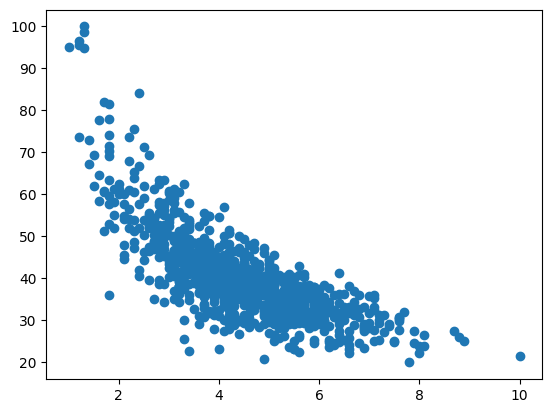

In [6]:
plt.scatter(df['Units'], df['Cost'])

In [9]:
import sklearn.linear_model as lm
import sklearn.metrics as metrics
import sklearn.model_selection as model_selection
from sklearn.preprocessing import PolynomialFeatures

In [10]:
poly_reg = PolynomialFeatures(degree=2)

In [11]:
x_poly = poly_reg.fit_transform(df[['Units']])
x_poly

array([[  1.  ,   1.  ,   1.  ],
       [  1.  ,   1.2 ,   1.44],
       [  1.  ,   1.2 ,   1.44],
       ...,
       [  1.  ,   8.8 ,  77.44],
       [  1.  ,   8.9 ,  79.21],
       [  1.  ,  10.  , 100.  ]])

In [13]:
x_poly_train, x_poly_test, y_train, y_test = model_selection.train_test_split(x_poly, df['Cost'], test_size=0.2)

In [15]:
model = lm.LinearRegression()


In [16]:
model.fit(x_poly_train, y_train)

LinearRegression()

In [17]:
model.intercept_

np.float64(90.45134811572026)

In [18]:
model.coef_

array([  0.        , -17.13157858,   1.19945941])

In [ ]:
y_pred = model.predict(x_poly_test)


In [20]:
compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [21]:
compare

,Actual,Predicted
808,32.0,32.129555
757,35.8,33.346796
196,38.5,46.979252
703,33.7,33.800522
373,34.3,40.374789
...,...,...
416,43.8,39.657182
314,43.4,42.671543
91,52.3,52.940145
86,46.9,52.940145


In [24]:
mse = metrics.mean_squared_error(y_test, y_pred)
mse

np.float64(33.96853874381354)

In [25]:
r2 = metrics.r2_score(y_test, y_pred)
r2

0.632339683782415

Text(0, 0.5, 'Cost')

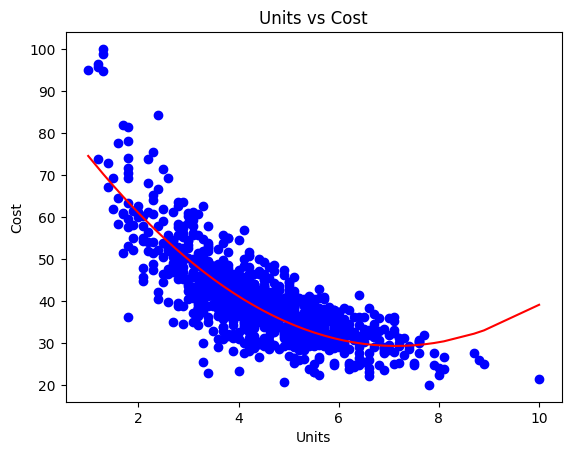

In [26]:
plt.scatter(df['Units'], df['Cost'], color='blue')
plt.plot(df['Units'], model.predict(x_poly), color='red')
plt.title('Units vs Cost')
plt.xlabel('Units')
plt.ylabel('Cost')
